In [1]:
#Import library which need for prediciton

import numpy as np                     #Pandas is used to analyze data
import pandas as pd                    #This library contains a large number of mathematical, algebraic, and transformation functions
from sklearn import metrics
#matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline                     
import matplotlib.pyplot as plt        # Used for Visualization of data
from sklearn.model_selection import train_test_split         # Used for splitting data into train data and test data


In [2]:
# Loading the Dataset using Pandas Library using pd.read_csv(filename with extenstion)

stock = pd.read_csv('AXISBANK.csv')

In [3]:
stock    #print the all the row of the dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


In [4]:
# Printing number of rows and column using shape

stock.shape

(5306, 15)

In [5]:
#change the date format 

stock['Date'] = pd.to_datetime(stock.Date)

In [6]:
#remove unnecessary columns from the stock dataset

list_drop = ['%Deliverble', 'Deliverable Volume']
stock.drop(list_drop,axis = 1, inplace = True)

In [7]:
# Printing First Five Rows of dataset using head()

stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN


In [8]:
# Printing Last Five Row of Dataset using tail()

stock.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0
5305,2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,1.655365e+15,232879.0


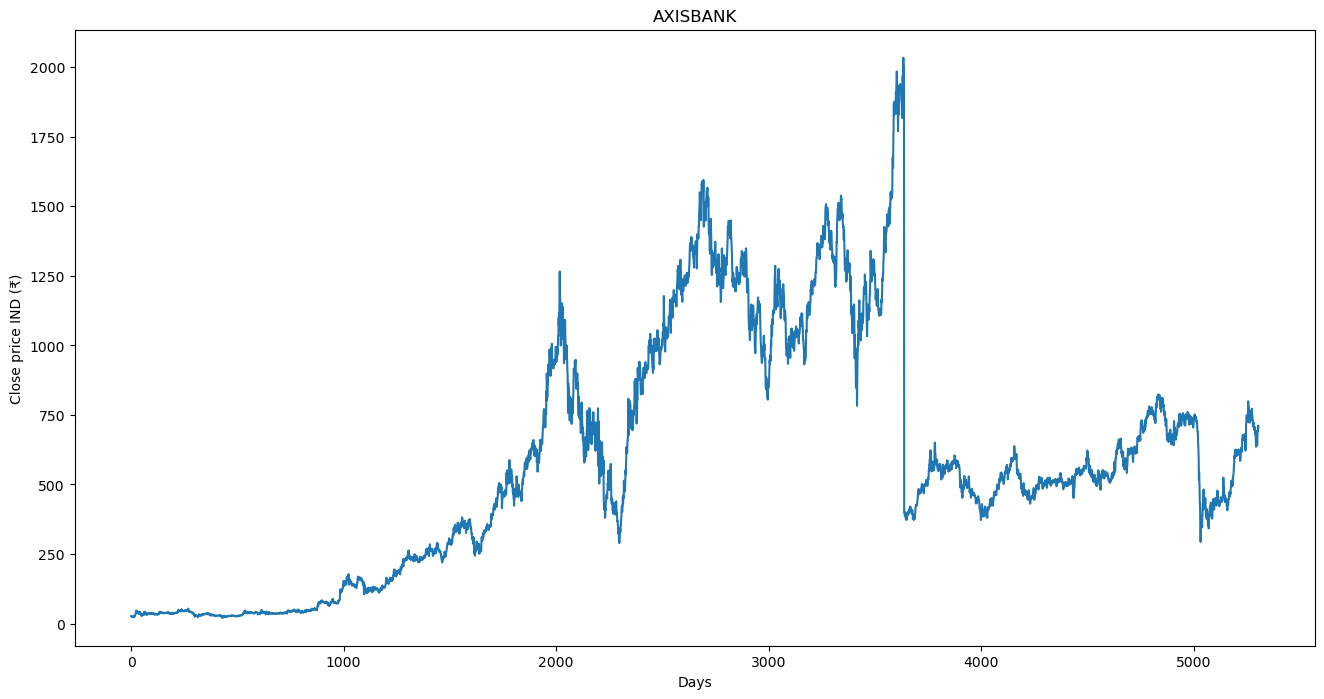

In [9]:
#Visualize the Open price data

plt.figure(figsize=(16,8))
plt.title('AXISBANK')
plt.xlabel('Days')
plt.ylabel('Close price IND (₹)')
plt.plot(stock['Open'])
plt.show()

In [10]:
# info(): This method prints information about a DataFrame including the index dtype and column dtypes, non-null values 

stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5306 non-null   datetime64[ns]
 1   Symbol      5306 non-null   object        
 2   Series      5306 non-null   object        
 3   Prev Close  5306 non-null   float64       
 4   Open        5306 non-null   float64       
 5   High        5306 non-null   float64       
 6   Low         5306 non-null   float64       
 7   Last        5306 non-null   float64       
 8   Close       5306 non-null   float64       
 9   VWAP        5306 non-null   float64       
 10  Volume      5306 non-null   int64         
 11  Turnover    5306 non-null   float64       
 12  Trades      2456 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 539.0+ KB


In [11]:
# describe() : is used to view some basic statistical details like percentile,mean, std, etc

stock.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
count,5306,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000
mean,2010-08-18 21:26:56.132679936,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678
min,2000-01-03 00:00:00,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000
25%,2005-04-13 12:00:00,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000
50%,2010-08-17 12:00:00,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000
75%,2015-12-17 18:00:00,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000
max,2021-04-30 00:00:00,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000
std,NaN,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046


In [12]:
# Checking for Null Values using isnull() it return whole dataset with boolean value (False- Notnull value and True- Null Value)

stock.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,False,False,False,False,False,False,False,False,False,False,False,False,False
5302,False,False,False,False,False,False,False,False,False,False,False,False,False
5303,False,False,False,False,False,False,False,False,False,False,False,False,False
5304,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# This is second way to check null value and here we use isnull() with sum() 

stock.isnull().sum()

Date             0
Symbol           0
Series           0
Prev Close       0
Open             0
High             0
Low              0
Last             0
Close            0
VWAP             0
Volume           0
Turnover         0
Trades        2850
dtype: int64

In [14]:
#calculate the length of dataset using len() command
print(len(stock))

5306


<Axes: >

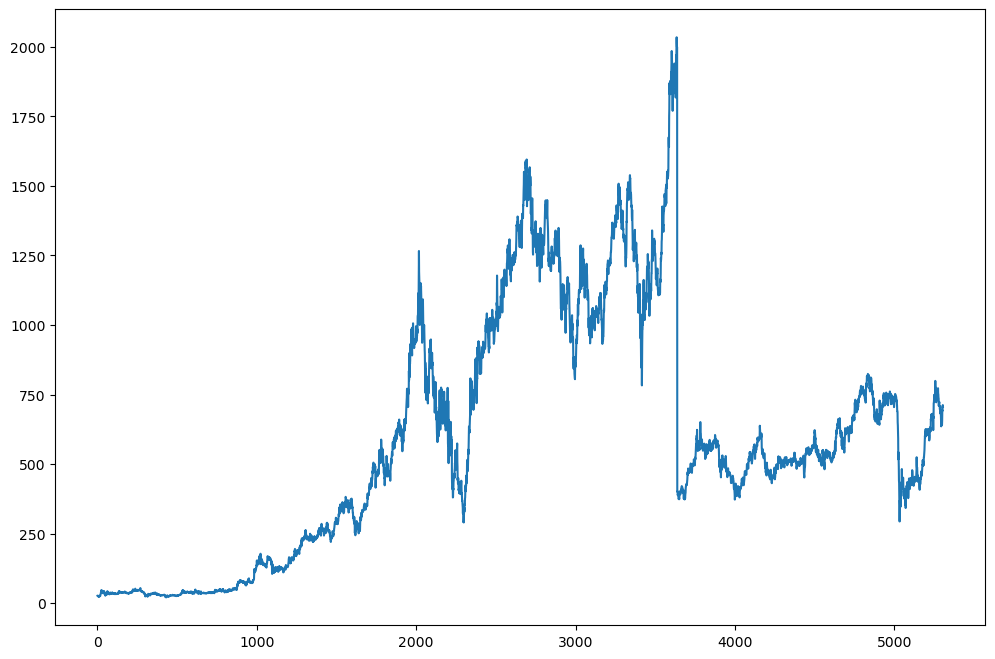

In [15]:
# We are just plotting  of Open value

stock['Open'].plot(figsize=(12,8))

<Axes: >

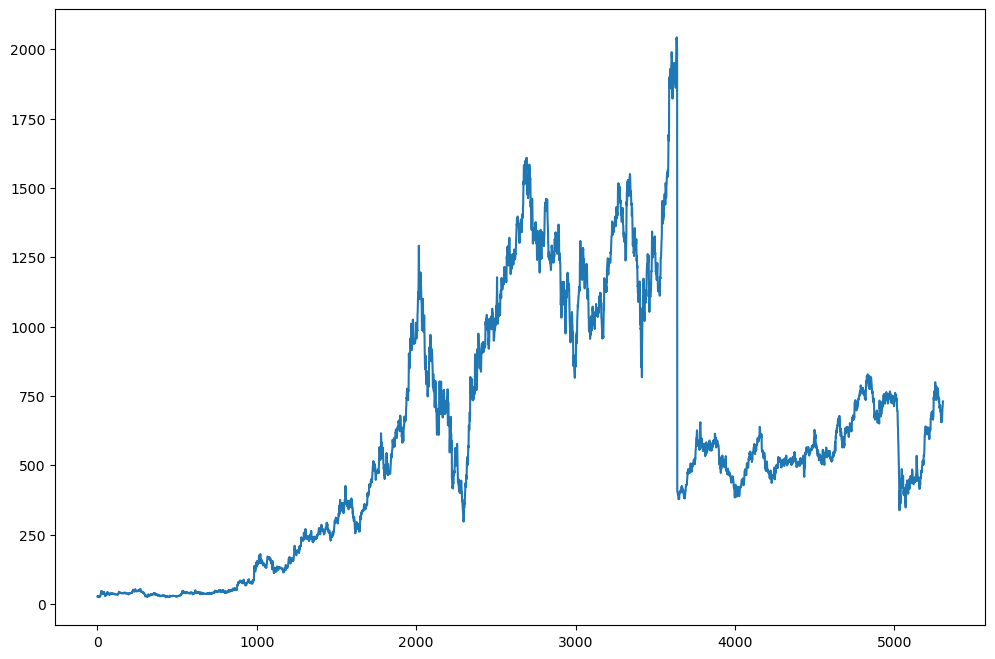

In [16]:
# We are just plotting  of High value

stock['High'].plot(figsize=(12,8))

<Axes: >

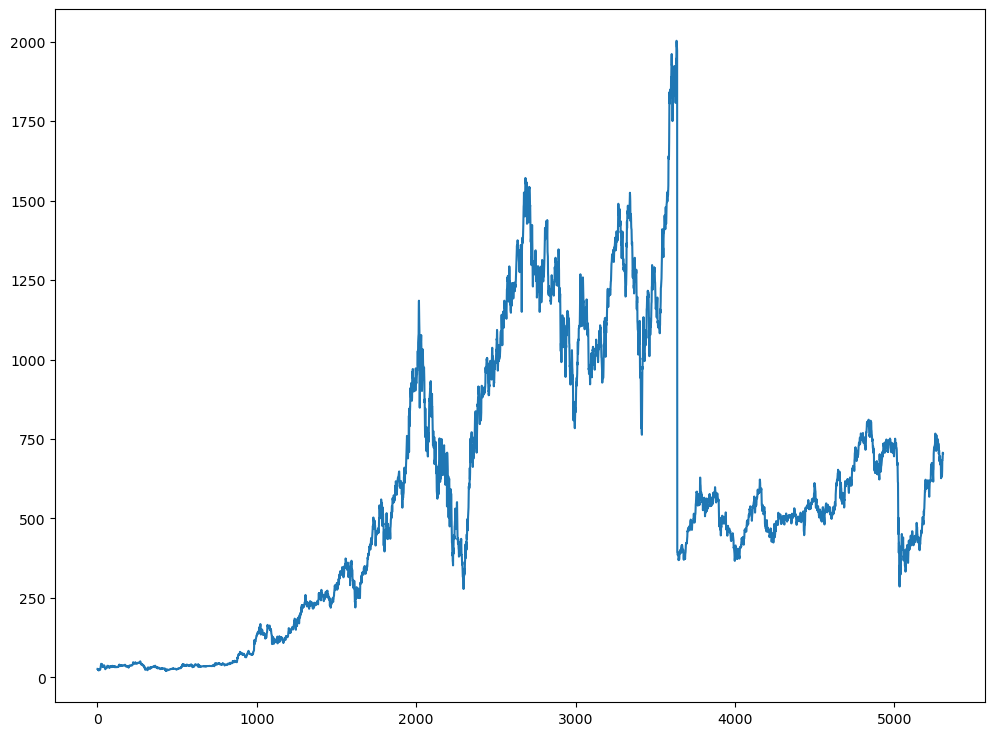

In [17]:
# We are just plotting  of Low value

stock['Low'].plot(figsize=(12,9))

<Axes: >

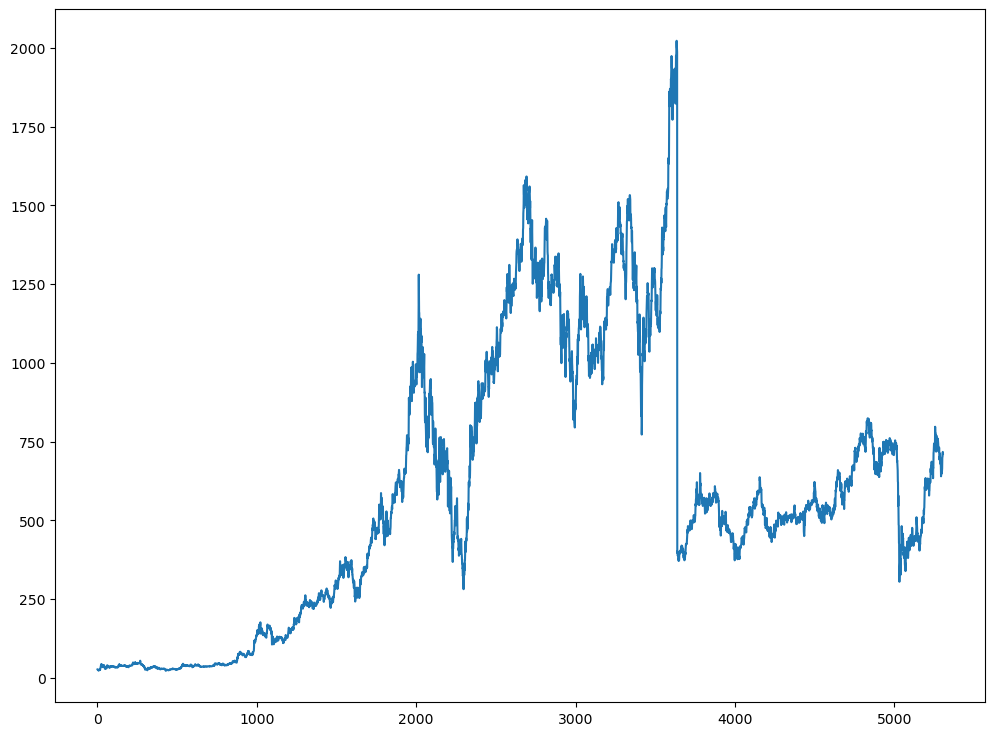

In [18]:
# We are just plotting  of Last value

stock['Last'].plot(figsize=(12,9))

<Axes: >

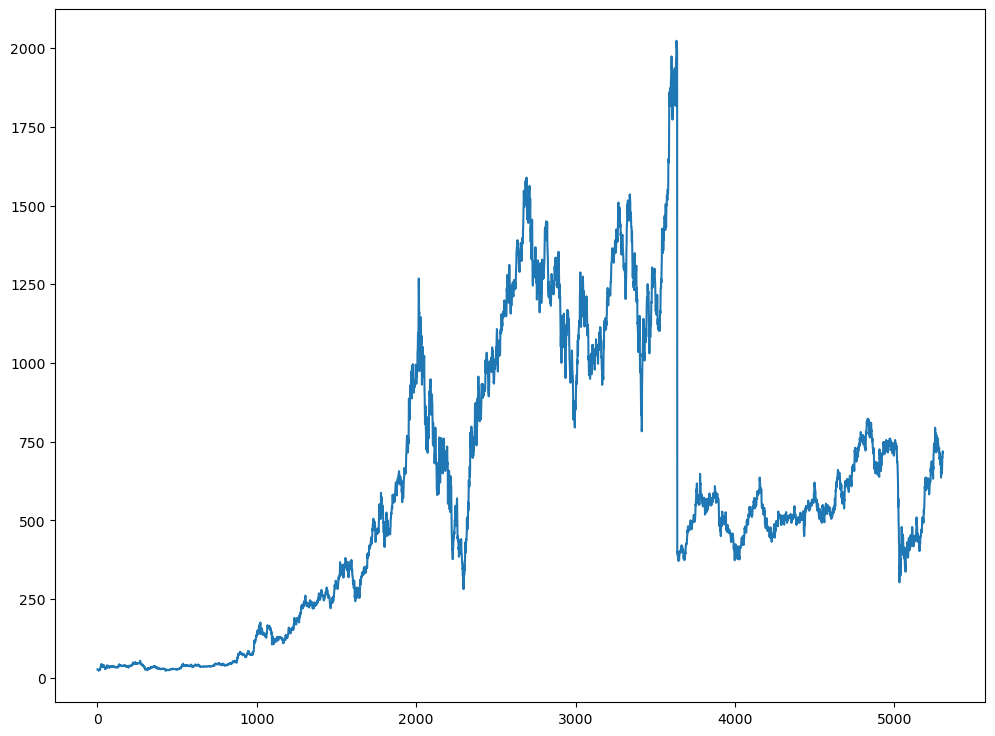

In [19]:
# We are just plotting  of Close value

stock['Close'].plot(figsize=(12,9))

<Axes: >

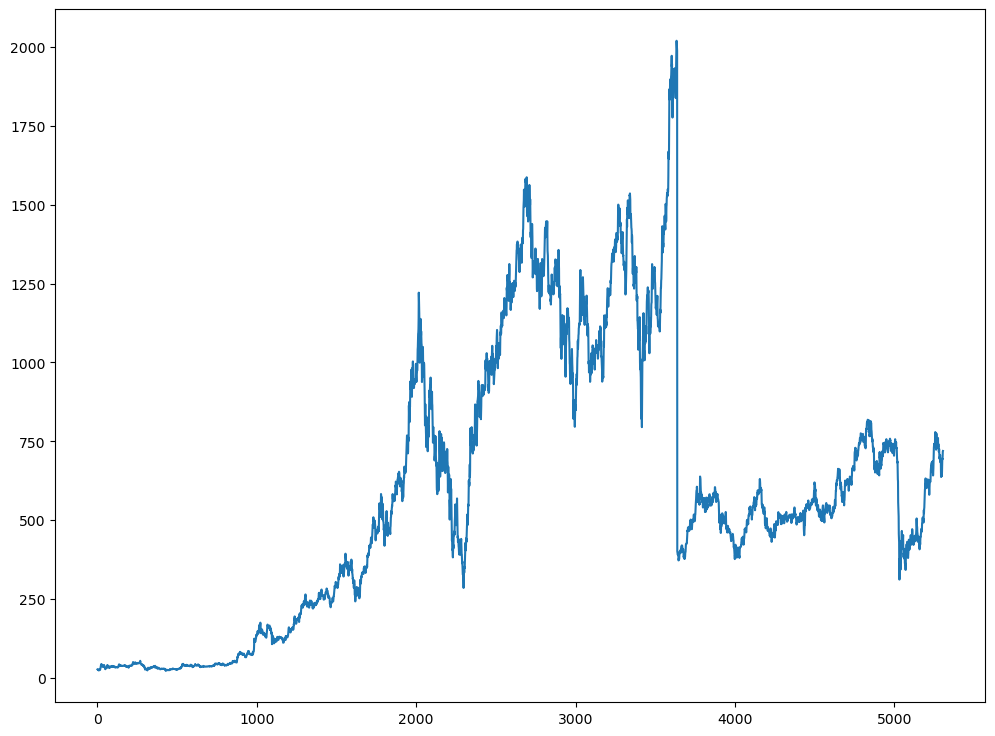

In [20]:
# We are just plotting  of VWAP value

stock['VWAP'].plot(figsize=(12,9))

<Axes: >

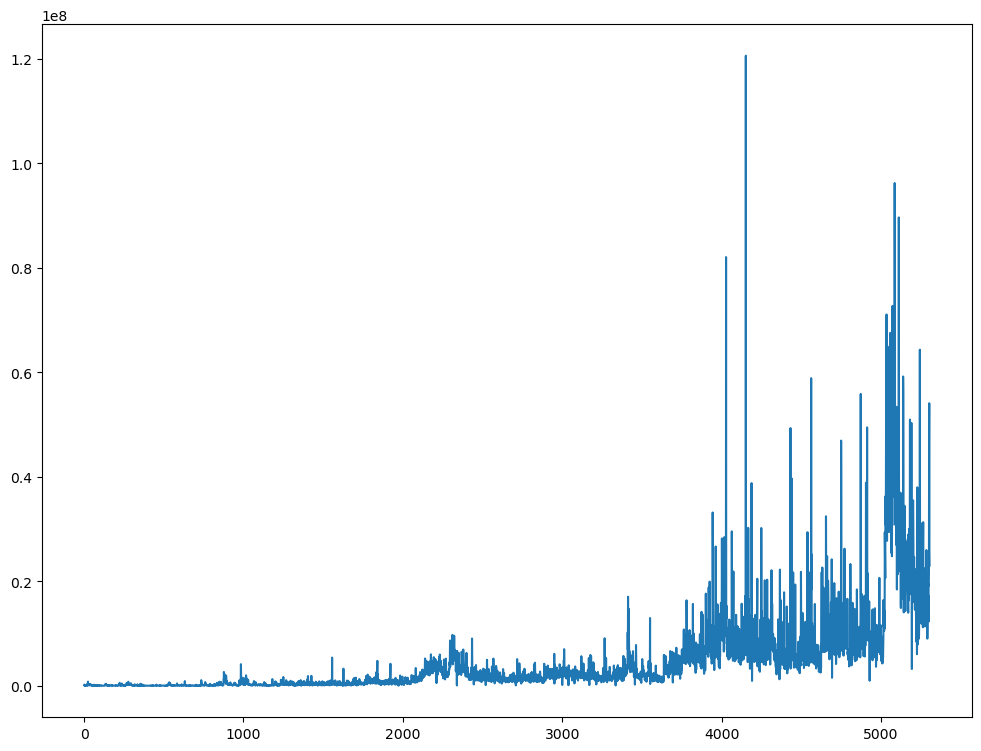

In [21]:
# We are just plotting  of Volume value

stock['Volume'].plot(figsize=(12,9))


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Turnover'}>,
        <Axes: title={'center': 'Trades'}>, <Axes: >]], dtype=object)

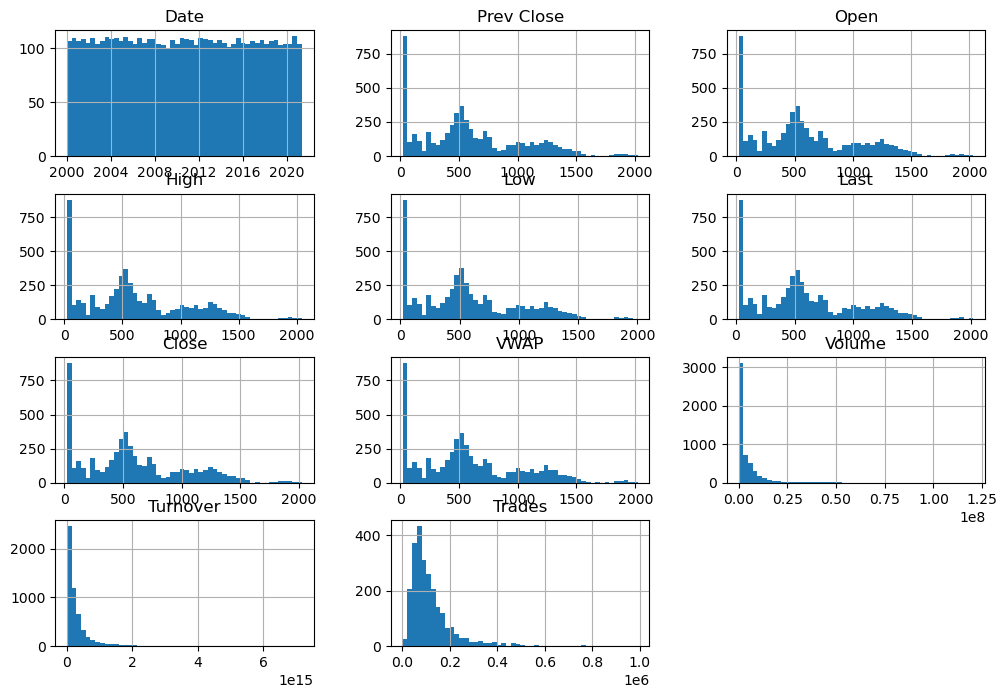

In [22]:
# Instead of Writing all the histogram seprately we can use

stock.hist(figsize=(12,8),bins=50)

In [23]:
#here we created a dependent and independent variables

X = stock[['Open','High','Low','Volume']]
y = stock['Close']

In [24]:
# Spliting data into train data and test data

X_train,X_test,y_train,y_test=train=train_test_split(X,y,random_state=0)

In [25]:
# Printing the size of X training dataset

X_train.shape

(3979, 4)

In [26]:
# Printing the size of X testing dataset

X_test.shape

(1327, 4)

In [27]:
# Printing the size of Y training dataset

y_train.shape

(3979,)

In [28]:
# Printing the size of Y testing dataset

y_test.shape

(1327,)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
# Creating instance of LinearRegression

model=LinearRegression()

In [31]:
# Fitting the data in the LinearRegression 

model.fit(X_train,y_train)

LinearRegression()

In [32]:
#calculate the Regression coefficients values
print(model.coef_)

[-5.27196137e-01  8.24976214e-01  7.00527711e-01 -1.99180381e-08]


In [33]:
print(model.intercept_)

-0.09416868128334954


In [34]:
predicted = model.predict(X_test)

In [35]:
print(X_test)

        Open     High     Low    Volume
3655  400.00   405.00  400.00   3805460
29     44.95    45.25   38.75    236000
5135  444.00   449.45  442.30  18197925
3671  411.00   414.00  397.35   3811175
4681  567.95   572.00  558.20  10235243
...      ...      ...     ...       ...
4198  459.00   493.95  458.95  12824970
4330  502.25   506.10  495.20   7549551
2048  971.10  1004.90  970.00    551430
4058  444.95   446.05  437.40   6674315
4722  636.95   646.90  629.00  11004125

[1327 rows x 4 columns]


In [36]:
predicted.shape

(1327,)

In [37]:
dframe = pd.DataFrame(y_test,predicted)

In [38]:
dfr = pd.DataFrame({'Actual':y_test,'predicted':predicted})

In [39]:
print(dfr)

      Actual   predicted
3655  402.80  403.278030
29     38.75   40.679287
5135  445.80  446.097246
3671  399.15  403.047147
4681  562.05  563.201882
...      ...         ...
4198  487.55  486.671550
4330  500.60  499.392984
2048  992.85  996.465157
4058  445.25  439.588432
4722  632.95  638.198115

[1327 rows x 2 columns]


In [40]:
dfr.head()

,Actual,predicted
3655,402.80,403.278030
29,38.75,40.679287
5135,445.80,446.097246
3671,399.15,403.047147
4681,562.05,563.201882


In [41]:
dfr.tail()

,Actual,predicted
4198,487.55,486.671550
4330,500.60,499.392984
2048,992.85,996.465157
4058,445.25,439.588432
4722,632.95,638.198115


In [42]:
model.score(X_test,y_test)

0.9997835753264832

In [43]:
import math

In [44]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.841410283936226


In [45]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 42.12843685083276


In [46]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 6.4906422525689065


In [47]:
graph=dfr.head(25)

<Axes: >

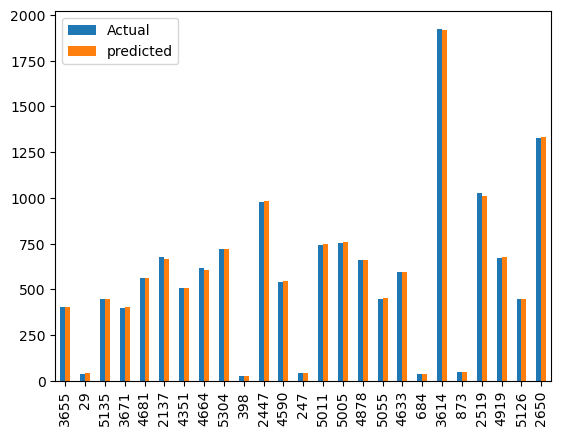

In [48]:
graph.plot(kind = 'bar')